# **Lab 1: Bisection Method**<br>

The bisection method (also known as the binary search method) is a method of finding roots of a non-linear function. The assumption here is that the function is real continuous, otherwise the bisection method will not work. It is based on the **Intermediate Value Theorem** which states that if $f(x)$ is a real continuous function, and if $f(x_l)f(x_u)< 0$ then there must be a root between $x_l$ and $x_u$.

In today's lab, we will be implementing the bisection method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3-2x^2+4$,
<br>
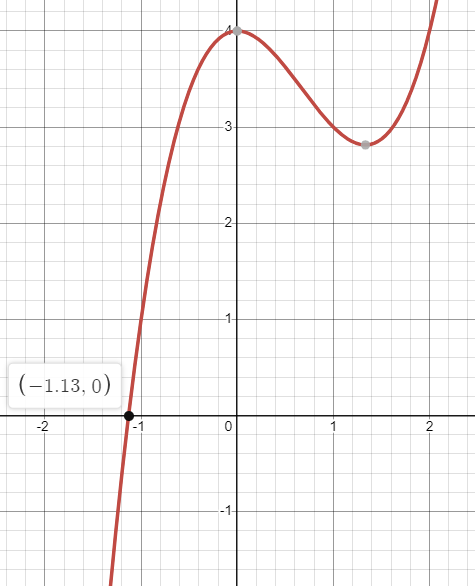
<br>
then in python we will create an array as follows:


In [ ]:
import numpy as np

f = np.array([1, -2, 0, 4])

print(f)

[ 1 -2  0  4]


Next, you will need to create a user-defined function as follows

```
bisection_method(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most $\epsilon_s$ $(\%)$, which is also called the prespecified tolerance.

In python, functions are defined as follows

In [ ]:
#Execute this cell to test how the function works

def func(a,b):
  result = a + b
  return result

print(func(1,2))

3


Note that in python, we do not need to specify the data type for parameters nor any return type for the function as these are implicitly determined. Also, note the colon (`:`) after the function signature. Indentation matters in python, since the consecutive codes having same indentation will be considered as a single block.

##Task 1
Implement the function for bisection method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly.

In [ ]:
# Complete the following function which will return the value of f(x).
def func(f, x):
  f = np.array([1, -2, 0, 4])
  res = 0
  for i in range(len(f)):
   res += f[i] * x**(len(f) - i - 1)
  return res

In [ ]:
print(f'f(1) = {func(f, 1)}')
print(f'f(3) = {func(f, 3)}')
print(f'f(-69) = {func(f, -69)}')

f(1) = 3
f(3) = 13
f(-69) = -338027


Your output should look something like,<br>
$f(1) = 3$<br>
$f(3) = 13$<br>
$f(-69) = -338027$<br>

Now, let's work on the `bisection_method` function. Here, `xl` and `xu` are respectively your initial lower and upper guesses that must bracket the root. `epsilon` is the prespecified tolerance value $\epsilon_s$.

In [ ]:
def bisection_method(f, xl, xu, epsilon, iterations):
    if func(f, xl) * func(f, xu) >= 0:
        print("The bisection method can't be applied.")
        return None

    x_root = xl
    for i in range(iterations):
        x_root = (xl + xu) / 2

        f_xl = func(f, xl)
        f_xu = func(f, xu)
        f_xr = func(f, x_root)

        if abs(f_xr) < epsilon or abs(xu - xl) < epsilon:
            return x_root

        if f_xl * f_xr < 0:
            xu = x_root
        else:
            xl = x_root

    return x_root

In [ ]:
#Write a driver code here for calling the function and testing it
f = np.array([1, -2, 0, 4])
xl = -2
xu = 3
epsilon = 0.005
MAX_ITERS = 100
print(bisection_method(f, xl, xu, epsilon, MAX_ITERS))

-1.130859375


Your function should return a root value $\approx -1.13$

## Note:
We can plot graphs in python using the `matplotlib` library. An example of plotting graphs is shown here.

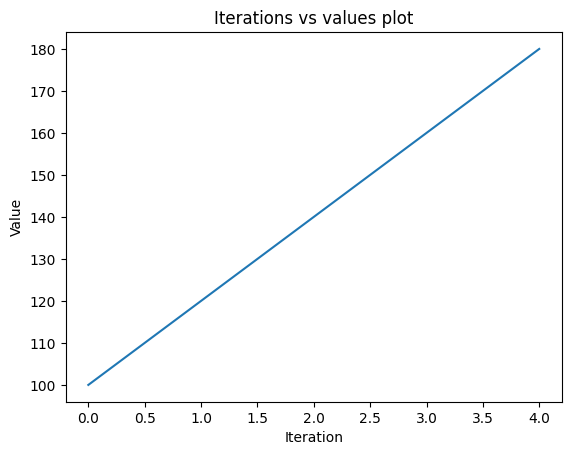

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

## Task 2
Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

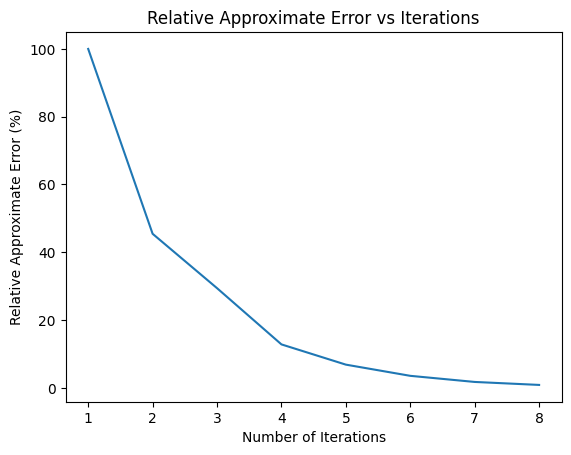

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(f, xl, xu, epsilon, iterations):
    def func(f, x):
        return np.polyval(f, x)

    # Ensure the bisection method can be applied
    if func(f, xl) * func(f, xu) >= 0:
        print("The bisection method cannot be applied.")
        return None, None

    x_root = xl
    rel_errors = []
    x_prev = 0

    for i in range(iterations):
        x_root = (xl + xu) / 2  # Midpoint

        if i > 0:
            # Avoid division by zero or very small values; add a check
            if abs(x_root) > 1e-10:  # Avoid very small root values
                rel_error = abs((x_root - x_prev) / x_root) * 100
                # Cap the error to avoid very large unrealistic values
                if rel_error < 100:
                    rel_errors.append(rel_error)
                else:
                    rel_errors.append(100)  # Cap the error at 100%
            else:
                rel_errors.append(100)  # Max error for very small root values

        x_prev = x_root
        f_xl = func(f, xl)
        f_xu = func(f, xu)
        f_xr = func(f, x_root)

        # Termination conditions
        if abs(f_xr) < epsilon or abs(xu - xl) < epsilon:
            return x_root, rel_errors

        # Update bounds
        if f_xl * f_xr < 0:
            xu = x_root
        else:
            xl = x_root

    return x_root, rel_errors

# Driver code
f = np.array([1, -2, 0, 4])  # Polynomial coefficients: x^3 - 2x^2 + 4
xl = -2
xu = 3
epsilon = 0.005
MAX_ITERS = 100

root, rel_errors = bisection_method(f, xl, xu, epsilon, MAX_ITERS)

# Plotting the relative approximate errors
if rel_errors:
    iterations = np.arange(1, len(rel_errors) + 1)
    plt.plot(iterations, rel_errors)
    plt.title("Relative Approximate Error vs Iterations")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Relative Approximate Error (%)")

    plt.show()
else:
    print("No relative approximate errors to plot.")


Your plot should look something like this,
<br>
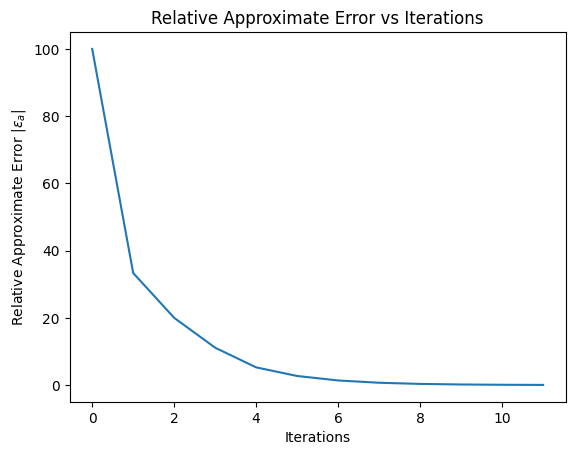

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

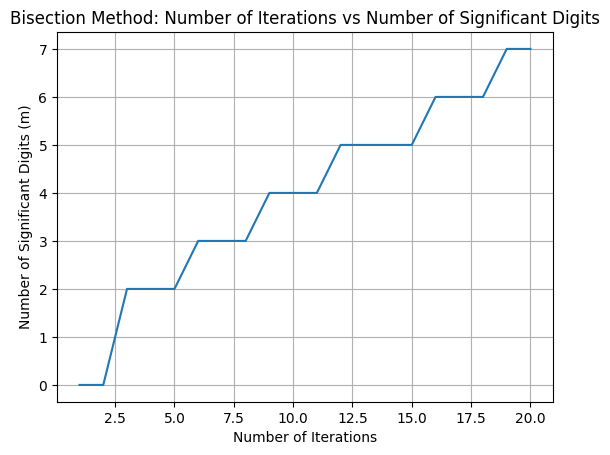

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(f, x):
    # Evaluate the polynomial at x
    res = 0
    for i in range(len(f)):
        res += f[i] * x**(len(f) - i - 1)
    return res

def significant_digits(x_current, x_prev):
    # Calculate the number of significant digits based on relative error
    if x_current == 0 or x_prev == 0:
        return 0
    relative_error = abs((x_current - x_prev) / x_current)
    if relative_error == 0:
        return float('inf')  # Infinite significant digits if there's no error
    return int(2-np.log10(relative_error))  # The log10 of the relative error gives us the number of digits

def bisection_method(f, xl, xu, epsilon, max_iterations):
    iterations = []
    sig_digits = []
    x_prev = None  # To store the previous midpoint

    if func(f, xl) * func(f, xu) >= 0:
        print("The bisection method can't be applied.")
        return None, None

    for i in range(max_iterations):
        x_root = (xl + xu) / 2  # Midpoint

        f_xl = func(f, xl)
        f_xu = func(f, xu)
        f_xr = func(f, x_root)

        iterations.append(i + 1)

        if i > 0:  # Skip the first iteration since there's no previous value to compare to
            digits = significant_digits(x_root, x_prev)
            sig_digits.append(digits)
        else:
            sig_digits.append(0)  # No significant digits in the first iteration

        if abs(f_xr) < epsilon or abs(xu - xl) < epsilon:
            break

        x_prev = x_root  # Update the previous value for the next iteration

        if f_xl * f_xr < 0:
            xu = x_root
        else:
            xl = x_root

    return iterations, sig_digits

# Define the polynomial f(x) = x^3 - 2x^2 + 4
f = np.array([1, -2, 0, 4])
xl = -2
xu = 2
epsilon = 1e-5
max_iterations = 20

# Run the bisection method
iterations, sig_digits = bisection_method(f, xl, xu, epsilon, max_iterations)

# Plot the results
plt.plot(iterations, sig_digits)
plt.xlabel('Number of Iterations')
plt.ylabel('Number of Significant Digits (m)')
plt.title('Bisection Method: Number of Iterations vs Number of Significant Digits')
plt.grid(True)
plt.show()


Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_m)$ along the $Y$-axis.

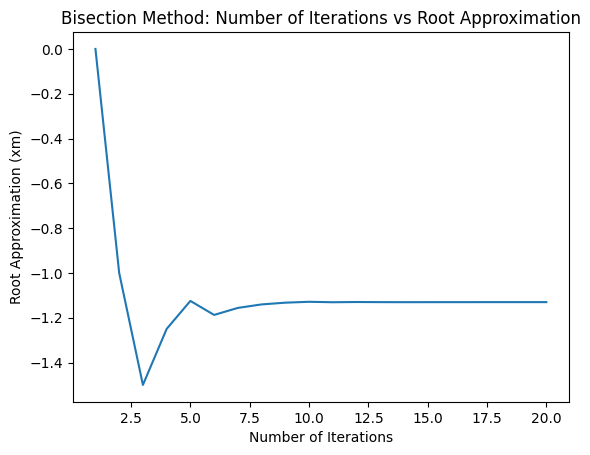

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(f, x):
    res = 0
    for i in range(len(f)):
        res += f[i] * x**(len(f) - i - 1)
    return res

def bisection_method(f, xl, xu, epsilon, max_iterations):
    iterations = []
    roots = []

    if func(f, xl) * func(f, xu) >= 0:
        print("The bisection method can't be applied.")
        return None

    for i in range(max_iterations):
        x_root = (xl + xu) / 2

        f_xl = func(f, xl)
        f_xu = func(f, xu)
        f_xr = func(f, x_root)

        iterations.append(i + 1)
        roots.append(x_root)

        if abs(f_xr) < epsilon or abs(xu - xl) < epsilon:
            break

        if f_xl * f_xr < 0:
            xu = x_root
        else:
            xl = x_root

    return iterations, roots

f = np.array([1, -2, 0, 4])
xl = -2
xu = 2
epsilon = 1e-5
max_iterations = 20
iterations, roots = bisection_method(f, xl, xu, epsilon, max_iterations)

plt.plot(iterations, roots)
plt.xlabel('Number of Iterations')
plt.ylabel('Root Approximation (xm)')
plt.title('Bisection Method: Number of Iterations vs Root Approximation')
plt.show()
